In [1]:

#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2.veri onisleme
#2.1.veri yukleme
veriler = pd.read_excel('iris.xls')
#pd.read_csv("veriler.csv")
#test
print(veriler)

x = veriler.iloc[:,1:4].values #bağımsız değişkenler
y = veriler.iloc[:,4:].values #bağımlı değişken
print(y)

#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)
print(y_pred)
print(y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

     sepal length  sepal width  petal length  petal width            iris
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['

c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')
rfc.fit(x_train,y_train)

y_pred=rfc.predict(X_test)

#ROC,TPR,FPR değerleri
y_proba=rfc.predict_proba(X_test)
cm = confusion_matrix(y_test,y_pred)
print('RFC')
print(cm)

print(y_test)
print(y_proba[:,0])

from sklearn import metrics
fpr,tpr,thold = metrics.roc_curve(y_test,y_proba[:,0],pos_label='e')
print(fpr)
print(tpr)

RFC
[[16  0  0]
 [19  0  0]
 [ 2 13  0]]
[['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-

c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


C:\Users\FurkanBulut\AppData\Local\Temp\ipykernel_8724\518846965.py:30: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
C:\Users\FurkanBulut\AppData\Local\Temp\ipykernel_8724\518846965.py:32: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
C:\Users\FurkanBulut\AppData\Local\Temp\ipykernel_8724\518846965.py:34: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


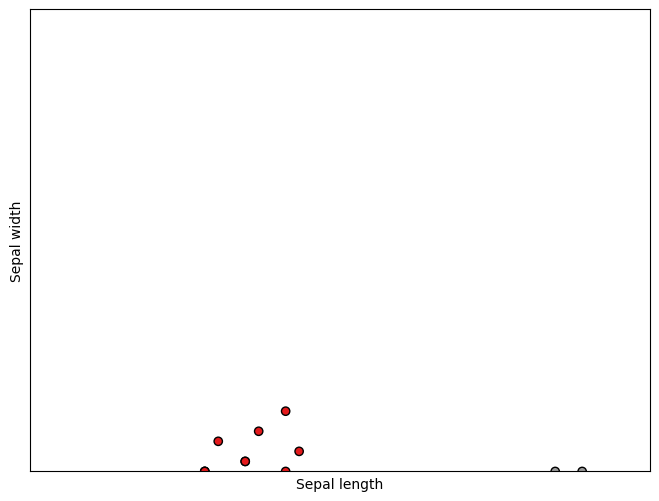

<Figure size 800x600 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris = datasets.load_iris()
x=iris.data[:,:2]
y=iris.target

x_min,y_max = x[:,0].min() - .5,x[:,0].max() +.5
y_min,x_max = x[:,0].min() - .5,x[:,0].max() +.5

plt.figure(2,figsize=(8,6))
plt.clf()

plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Set1,edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1,figsize=(8,6))
ax = Axes3D(fig,elev=-150,azim=110)
ax.scatter(iris.data[:,0],iris.data[:,1],iris.data[:,2],c=y,
           cmap=plt.cm.Set1,edgecolor='k',s=40)
ax.set_title('Iris verisi')
ax.set_xlabel('Birinci Özellik')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('Ikinci Özellik')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('Üçünçü özellik')
ax.w_zaxis.set_ticklabels([])

plt.show()

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]


c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [7]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)


SVC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)

GNB
[[16  0  0]
 [ 0 19  0]
 [ 0  2 13]]


c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('DTC')
print(cm)

DTC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('RFC')
print(cm)


RFC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)



from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)



from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('DTC')
print(cm)


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('RFC')
print(cm)



[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]
SVC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
GNB
[[16  0  0]
 [ 0 19  0]
 [ 0  2 13]]
DTC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
RFC
[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]


c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\FurkanBulut\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 